In [1]:
import pandas as pd
from dataAnalysis.Constants import FEATURES, SEX_CATEGORY_COLUMN_NAME, FEATURES_IN_TABLE

In [2]:
mimic_sbc = pd.read_csv("hosp_mimic_sbc.csv")

In [3]:
mimic_sbc = mimic_sbc.dropna(subset=FEATURES_IN_TABLE)

In [4]:
mimic_sbc.loc[:, SEX_CATEGORY_COLUMN_NAME] = mimic_sbc["Sex"] == "W"

In [5]:
mimic_sbc[SEX_CATEGORY_COLUMN_NAME] = mimic_sbc[SEX_CATEGORY_COLUMN_NAME].astype(int)

In [6]:
X = mimic_sbc.loc[:,  FEATURES].values
y = mimic_sbc.loc[:, "Label"].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

In [8]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)

In [9]:
from dataAnalysis.Metrics import Evaluation

evaluation = Evaluation(y_test, y_test, X_test, X_test)

/home/dwalke/.local/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [10]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(model, param_grid):
    grid = GridSearchCV(
    n_jobs=-1,
    cv=10,
    estimator=model,
    scoring='roc_auc',
    refit='auroc',
    return_train_score=True,
    param_grid=param_grid,
    verbose= 10
    )
    grid.fit(X_train, y_train)
    return grid.best_estimator_

In [ ]:
from xgboost import XGBClassifier
param_grid = {
    'max_depth': [10, 12, 14],
    'learning_rate': [0.1, .01],
    'gamma': [0],
    'reg_lambda': [0, 1, 10],
    'scale_pos_weight': [counts[0]/ counts[1]],
    "min_child_weight": [2, 5, 7],
    "max_delta_step": [2,4,6],
    'n_estimators': [i for i in range(700, 1500, 100)]
}
xgb_classifier = get_best_estimator(XGBClassifier(tree_method='gpu_hist', gpu_id = 1,
                                                        seed = 42), param_grid)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
[CV 1/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.4s
[CV 7/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 12/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_we

/home/dwalke/.local/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 9/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  20.5s
[CV 10/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 21/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 22/1296] END gamma=0, learning_

[CV 2/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.1s
[CV 6/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 9/1296] END gamma=0, learning_rate=0.1, 

[CV 6/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.5s
[CV 2/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 8/1296] END gamma=0, learning_rate=0.1,

[CV 6/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.3s
[CV 1/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 10/1296] END gamma=0, learning_rate

[CV 7/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.8s
[CV 10/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 4/10; 12/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 12/1296] END gamma=0, learning_r

[CV 3/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.7s
[CV 8/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 9/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 9/1296] END gamma=0, learning_rate=0

[CV 6/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  20.4s
[CV 7/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 21/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 21/1296] END gamma=0, learning_r

[CV 7/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.4s
[CV 7/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 7/1296] END gamma=0, learning_rate=0.1,

[CV 1/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.2s
[CV 10/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 9/1296] END gamma=0, learning_rate=0.1

[CV 4/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.7s
[CV 5/10; 10/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 10/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 11/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 11/1296] END gamma=0, learning_rate

[CV 1/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  15.4s
[CV 1/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 15/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 15/1296] END gamma=0, learning_r

[CV 9/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.2s
[CV 3/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 8/1296] END gamma=0, learning_rate=0.1,

[CV 1/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  21.2s
[CV 3/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 22/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 22/1296] END gamma=0, learning_rate

[CV 3/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  13.6s
[CV 7/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 13/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 13/1296] END gamma=0, learning_rate

[CV 7/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  20.9s
[CV 4/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 22/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 22/1296] END gamma=0, learning_ra

[CV 2/10; 7/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 7/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  15.7s
[CV 9/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 15/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 16/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 16/1296] END gamma=0, learning_ra

[CV 2/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  18.5s
[CV 4/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 18/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 18/1296] END gamma=0, learning_r

[CV 10/10; 3/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 3/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  18.3s
[CV 3/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 18/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 18/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 18/1296] END gamma=0, learni

[CV 5/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 8/10; 110/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 110/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 111/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 111/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 8/10; 2/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 2/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  13.3s
[CV 1/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 13/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 13/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 13/1296] END gamma=0, learning_rate

[CV 1/10; 6/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 6/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.8s
[CV 3/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 15/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 6/10; 15/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 15/1296] END gamma=0, learning

[CV 7/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.6s
[CV 8/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 14/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 14/1296] END gamma=0, learning_ra

[CV 8/10; 4/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 4/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.1s
[CV 5/10; 8/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 8/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 9/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 9/1296] END gamma=0, learning_rate=0.1, 

[CV 10/10; 1/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 10/10; 1/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  19.9s
[CV 2/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 21/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 21/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 21/1296] END gamma=0, learning

[CV 10/10; 5/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 5/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  21.2s
[CV 7/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 22/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 22/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 22/1296] END gamma=0, learning_ra

[CV 10/10; 103/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.6s
[CV 3/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 5/10; 6/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 6/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.3s
[CV 7/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 14/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 14/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=10, min_child_weight=2, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 14/1296] END gamma=0, learning_ra

[CV 7/10; 116/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.6s
[CV 5/10; 123/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 123/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 127/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time

[CV 3/10; 95/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.8s
[CV 7/10; 101/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 101/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 105/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 105/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=

[CV 10/10; 107/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.7s
[CV 4/10; 111/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 111/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 112/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 112/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total

[CV 10/10; 94/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.4s
[CV 1/10; 103/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 103/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 2/10; 106/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time

[CV 8/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.3s
[CV 3/10; 113/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 113/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 7/10; 114/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 114/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 10/10; 100/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.8s
[CV 1/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 109/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 109/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 10/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  18.7s
[CV 10/10; 150/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 150/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 155/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 155/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 9/10; 114/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.0s
[CV 5/10; 122/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 122/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 126/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 126/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total tim

[CV 1/10; 106/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.1s
[CV 7/10; 119/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 119/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 119/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 119/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 8/10; 91/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 91/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.2s
[CV 7/10; 108/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 108/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 108/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 108/1296] END gamma=0, le

[CV 1/10; 110/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 110/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  12.3s
[CV 1/10; 126/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 126/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 128/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 128/1296] END gamma=0, lear

[CV 5/10; 112/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.1s
[CV 3/10; 121/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 121/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 121/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 121/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 4/10; 120/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   4.1s
[CV 5/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 3/10; 131/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 131/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 1/10; 114/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.6s
[CV 4/10; 125/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 125/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 128/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 128/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=

[CV 2/10; 131/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.7s
[CV 3/10; 136/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 136/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 138/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 138/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 4/10; 142/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.2s
[CV 4/10; 149/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 149/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 152/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 152/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 4/10; 116/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.1s
[CV 2/10; 124/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 124/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 6/10; 127/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time= 

[CV 1/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.8s
[CV 7/10; 135/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 135/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 138/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 138/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 7/10; 111/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.0s
[CV 10/10; 123/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 123/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 127/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 127/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 9/10; 107/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 107/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  16.6s
[CV 3/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 130/1296] END gamma=0, lea

[CV 7/10; 130/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 130/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.6s
[CV 7/10; 141/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 141/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 143/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=12, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 143/1296] END gamma=0, l

[CV 9/10; 225/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 225/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.8s
[CV 2/10; 234/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 234/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 234/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 234/1296] END gamma=0, 

[CV 4/10; 217/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 217/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 217/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 217/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 8/10; 219/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 219/1296] END gamma=0, learnin

[CV 9/10; 179/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.8s
[CV 6/10; 189/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 189/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 189/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 189/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 8/10; 147/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 147/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=  14.3s
[CV 7/10; 167/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 167/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 168/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 168/1296] END gamma=0, le

[CV 3/10; 194/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 194/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 194/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 194/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 2/10; 202/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 202/1296] END gamma=0, learnin

[CV 9/10; 168/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 168/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=2, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.7s
[CV 3/10; 181/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 181/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 7/10; 181/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=5, n_estimators=1100, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 181/1296] END gamma=0, l

[CV 7/10; 248/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 248/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 1/10; 252/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 252/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 7/10; 263/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 263/1296] END gamma=0, lea

[CV 6/10; 284/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   3.9s
[CV 7/10; 288/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 7/10; 288/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 5/10; 290/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 290/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=700, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 1/10; 211/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 1/10; 211/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 214/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 3/10; 214/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 9/10; 220/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 220/1296] END gamma=0, lear

[CV 6/10; 215/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 6/10; 215/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 1/10; 216/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 216/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.5s
[CV 1/10; 221/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 221/1296] END gamma=0, le

[CV 9/10; 211/1296] START gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 9/10; 211/1296] END gamma=0, learning_rate=0.1, max_delta_step=2, max_depth=14, min_child_weight=7, n_estimators=1300, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 4/10; 225/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 225/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 6/10; 228/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 228/1296] END gamma=0, le

[CV 7/10; 221/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 221/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 2/10; 225/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 225/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.3s
[CV 8/10; 233/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 8/10; 233/1296] END gamma=0, learn

[CV 6/10; 220/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 220/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=800, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 223/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 223/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.9s
[CV 2/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 2/10; 232/1296] END gamma=0, learnin

[CV 6/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 232/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 232/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 232/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.9s
[CV 4/10; 243/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=700, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 243/1296] END gamma=0, lea

[CV 1/10; 224/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 224/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 9/10; 227/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 227/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.4s
[CV 3/10; 236/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 236/1296] END gamma=0, learn

[CV 2/10; 224/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 2/10; 224/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 227/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 227/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.8s
[CV 4/10; 237/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 237/1296] END gamma=0, lear

[CV 9/10; 236/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 236/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 3/10; 237/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 237/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   6.7s
[CV 8/10; 246/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 246/1296] END gamma=0, l

[CV 1/10; 239/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 239/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 239/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 7/10; 239/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 1/10; 249/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 249/1296] END gamma=0, lea

[CV 5/10; 252/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 252/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.3s
[CV 5/10; 265/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 5/10; 265/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 7/10; 265/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=700, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 265/1296] END gamma=0, lear

[CV 7/10; 332/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 332/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 332/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.9s
[CV 7/10; 256/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 7/10; 256/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1200, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total 

[CV 4/10; 238/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 4/10; 238/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 8/10; 238/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 8/10; 238/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=2, n_estimators=1400, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.4s
[CV 5/10; 248/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 5/10; 248/1296] END gamma=0, lear

[CV 3/10; 250/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.2s
[CV 1/10; 260/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 1/10; 260/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 4/10; 260/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 4/10; 260/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total ti

[CV 7/10; 251/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1000, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   8.0s
[CV 2/10; 264/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 264/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 8/10; 264/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 264/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=5, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

[CV 4/10; 309/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 309/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.5s
[CV 6/10; 319/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325
[CV 6/10; 319/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=0, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 3/10; 320/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=5, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 3/10; 320/1296] END gamma=0, lear

[CV 6/10; 285/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 285/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.7s
[CV 2/10; 294/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 294/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=800, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 10/10; 296/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 296/1296] END gamma=0, 

[CV 1/10; 297/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 1/10; 297/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   5.5s
[CV 8/10; 303/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 303/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.1s
[CV 9/10; 303/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1100, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 303/1296] END gamma=0, 

[CV 8/10; 288/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=10, min_child_weight=7, n_estimators=1400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   9.1s
[CV 9/10; 296/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 9/10; 296/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.3s
[CV 6/10; 300/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 300/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1000, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total t

[CV 5/10; 297/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=900, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   7.8s
[CV 6/10; 306/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 6/10; 306/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1200, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) total time=   0.2s
[CV 10/10; 308/1296] START gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325
[CV 10/10; 308/1296] END gamma=0, learning_rate=0.1, max_delta_step=4, max_depth=12, min_child_weight=2, n_estimators=1300, reg_lambda=1, scale_pos_weight=27.02999098372325;, score=(train=nan, test=nan) tota

In [ ]:
xgb_classifier

         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.241404  0.863916  0.579189   0.233045  0.828267  0.256711
1  Greifswald  0.241404  0.863916  0.579189   0.233045  0.828267  0.256711


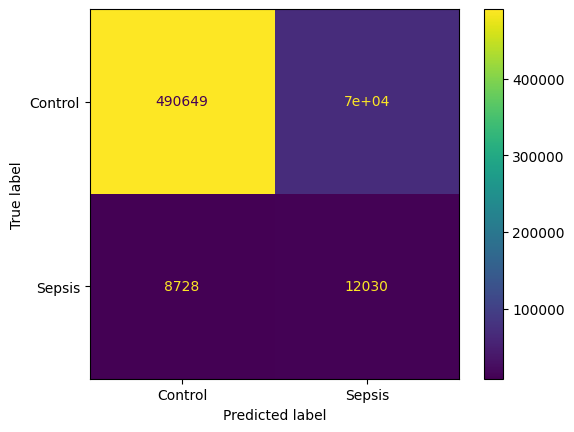

[CV 8/10; 1/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 8/10; 1/12] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=300, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=0.750, test=0.754) total time=  49.3s
[CV 2/10; 8/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=400, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 2/10; 8/12] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=400, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=0.953, test=0.823) total time= 3.8min
[CV 9/10; 1/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=300, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 1/12] END gamma=0, learning_rate=0.1, max

[CV 5/10; 3/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 3/12] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=0.759, test=0.749) total time= 1.3min
[CV 5/10; 9/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 5/10; 9/12] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=0.965, test=0.824) total time= 4.3min
[CV 3/10; 3/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 3/10; 3/12] END gamma=0, learning_rate=0.1, max

[CV 10/10; 3/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 10/10; 3/12] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=0.759, test=0.746) total time= 1.3min
[CV 4/10; 10/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 4/10; 10/12] END gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=10, min_child_weight=7, n_estimators=600, reg_lambda=10, scale_pos_weight=27.02999098372325;, score=(train=0.971, test=0.831) total time= 4.8min
[CV 9/10; 3/12] START gamma=0, learning_rate=0.1, max_delta_step=6, max_depth=2, min_child_weight=7, n_estimators=500, reg_lambda=10, scale_pos_weight=27.02999098372325
[CV 9/10; 3/12] END gamma=0, learning_rate=0.1,

In [31]:
from xgboost import XGBClassifier
xgb_classifier_model = XGBClassifier(tree_method='gpu_hist', 
                           scale_pos_weight = counts[0]/ counts[1],
                           n_estimators=800,
                           max_depth=10,
                           eta=0.1,
                           min_child_weight = 7,
                           max_delta_step= 7,
                           sampling_method= "uniform")
xgb_classifier_model.fit(X_train, y_train)
print(evaluation.get_df_metrics(xgb_classifier_model))
evaluation.plot_confusion_matrix(xgb_classifier_model)

In [11]:
import torch
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

X_train, X_val, y_train, y_val = train_test_split(
     X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

X_train= torch.from_numpy(X_train).type(torch.float)
X_val= torch.from_numpy(X_val).type(torch.float)
X_test= torch.from_numpy(X_test).type(torch.float)
y_train= torch.from_numpy(y_train).type(torch.float)
y_val= torch.from_numpy(y_val).type(torch.float)
y_test= torch.from_numpy(y_test).type(torch.float)

X_train = X_train.to(device)
y_train = y_train.to(device)

X_val = X_val.to(device)
y_val = y_val.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

WEIGHT = torch.tensor([counts[0]/ counts[1]])
WEIGHT = WEIGHT.to(device)

print("Data shifted to the device " + str(device))

Data shifted to the device cuda:0


In [12]:
import torch.nn.functional as F
from torch.nn import Linear
import torch
from dataAnalysis.Constants import FEATURES

class NeuralNetwork(torch.nn.Module):

    def __init__(self, hidden_dim = 128, out_channels = 1):
        super(NeuralNetwork, self).__init__()
        
        input_dim = len(FEATURES)
        self.lin_0 = Linear(input_dim, hidden_dim)
        self.lin_1 = Linear(input_dim, hidden_dim)
        self.lin_end_0 = Linear(hidden_dim, out_channels)
        self.lin_end_1 = Linear(hidden_dim, out_channels)
        self.batchnorm_1 = torch.nn.BatchNorm1d(hidden_dim)

    def forward(self, x):
        x = self.lin_0(x) + self.lin_1(x)
#         x = F.normalize(x, p=2., dim=-1)
        x = torch.relu(x)
#         x= self.batchnorm_1(x)
        x = self.lin_end_0(x) + self.lin_end_1(x) 
        return x
            
    def predict_proba(self, x):
        with torch.inference_mode():
            self.eval()
            logits = self.forward(x)
            scores = torch.sigmoid(torch.squeeze(logits))
            scores = torch.unsqueeze(scores, 0)
            proba_predict = torch.concat((1- scores, scores), dim = 0)
            return torch.transpose(proba_predict, 0, 1)
            
    def predict(self, x):
        return torch.round(self.predict_proba(x)[:, 1])

In [13]:
X_train.shape

torch.Size([945081, 7])

In [14]:
torch.isnan(X_train).sum()

tensor(0, device='cuda:0')

In [15]:
import torch 

class ModelWrapper():
    def __init__(self):
        self.LEARNING_RATE = 3e-4
        self.MAX_EPOCHS = 10000

        self.model = NeuralNetwork(hidden_dim = 128, out_channels=1) 
        self.model = self.model.to(device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.LEARNING_RATE,betas=(0.9, 0.999), eps=1e-08)
        
        self.last_loss = 0
        self.increased_loss = 0
        self.BREAKING_THRESHOLD = 5      
    
    def validate(self):
        with torch.inference_mode():
            self.model.eval()
            out = self.model(X_val)
            loss = F.binary_cross_entropy_with_logits(torch.squeeze(out), y_val.type(torch.float32),
                                                      pos_weight=WEIGHT)
            
            if loss.item() > self.last_loss:
                self.increased_loss += 1
            else:
                self.increased_loss = 0
            self.last_loss = loss.item()
            
            

    def train(self):
        global y_test, X_test
        for epoch in range(self.MAX_EPOCHS):
#             print(epoch)
            self.model.train()
            self.optimizer.zero_grad()
            out = self.model(X_train)
            loss = F.binary_cross_entropy_with_logits(torch.squeeze(out), y_train.type(torch.float32),
                                                      pos_weight=WEIGHT)
            print(loss)
            loss.backward()
            self.optimizer.step()
            self.validate() 

            if self.increased_loss >= self.BREAKING_THRESHOLD:
                print(f"Breaked at {str(epoch)}")
                break
            if epoch % 3 == 0:
                model = self.get_model()
                y_test = y_test.cpu()
                X_test = X_test.cpu()
                model = model.cpu()
                from dataAnalysis.Metrics import Evaluation

                evaluation = Evaluation(y_test, y_test, X_test, X_test)
                print(evaluation.get_df_metrics(model))
                evaluation.plot_confusion_matrix(model)
                model = model.to(device)
            
    def get_model(self):
        return self.model    

tensor(18.6185, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.032508  0.859635  0.502042   0.080062  0.527152  0.043243
1  Greifswald  0.032508  0.859635  0.502042   0.080062  0.527152  0.043243
tensor(16.8962, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(15.2146, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(13.5856, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
         Name       MCC  F1-Micro  F1-Macro  F1-Binary     AUROC     AUPRC
0     Leipzig  0.035204  0.804565  0.486724   0.082817  0.529072  0.044023
1  Greifswald  0.035204  0.804565  0.486724   0.082817  0.529072  0.044023
tensor(12.0275, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(10.5583, device='cuda:0',
       grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(9.1892, d

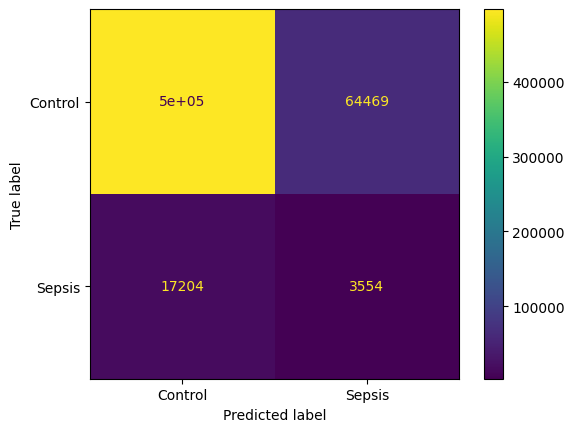

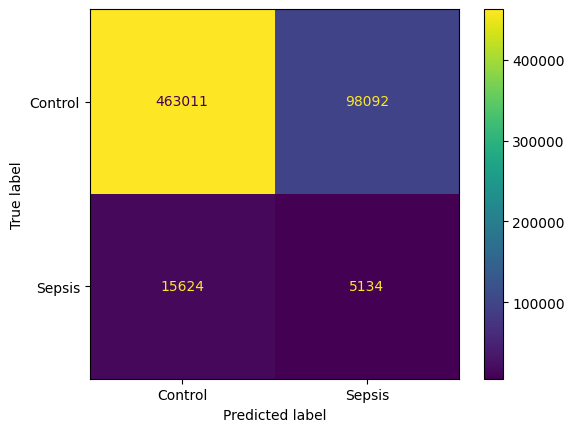

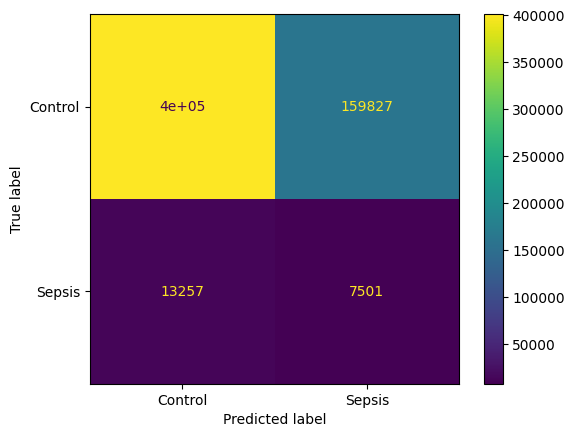

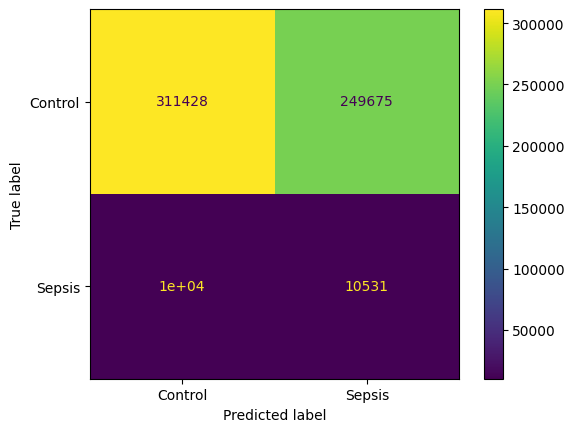

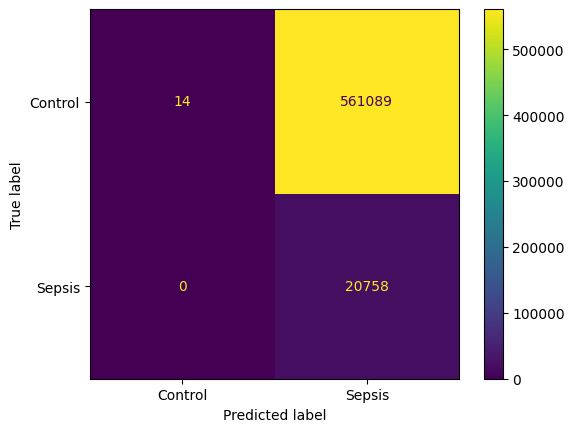

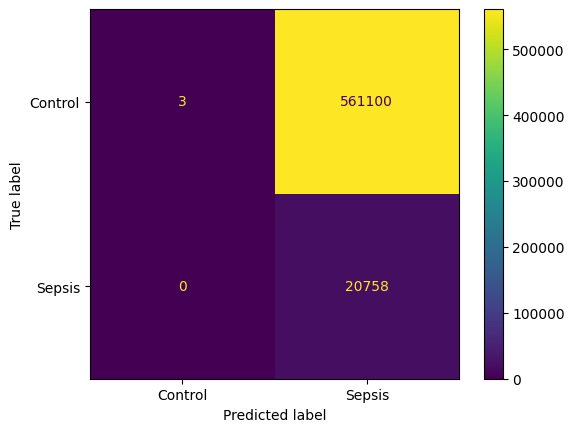

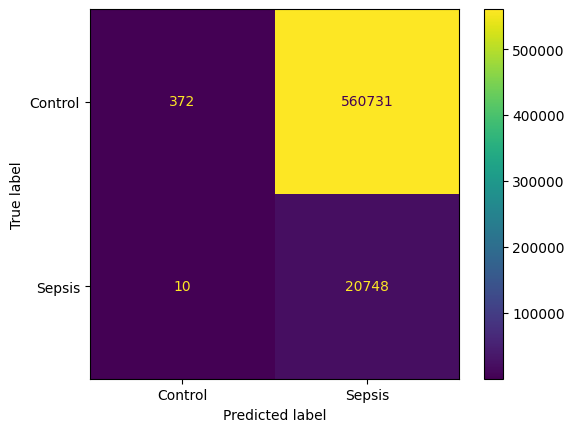

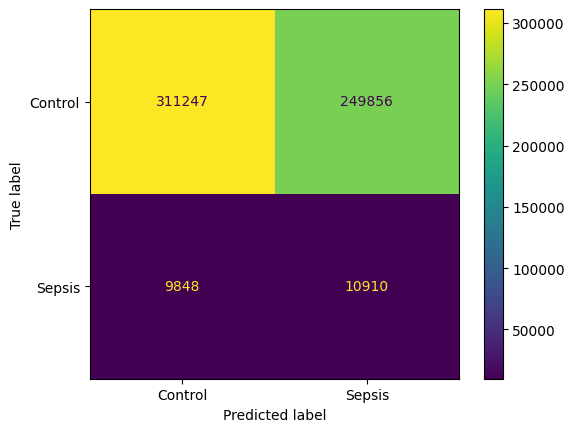

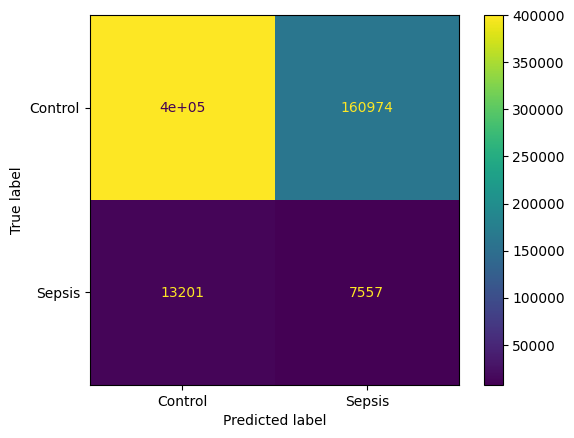

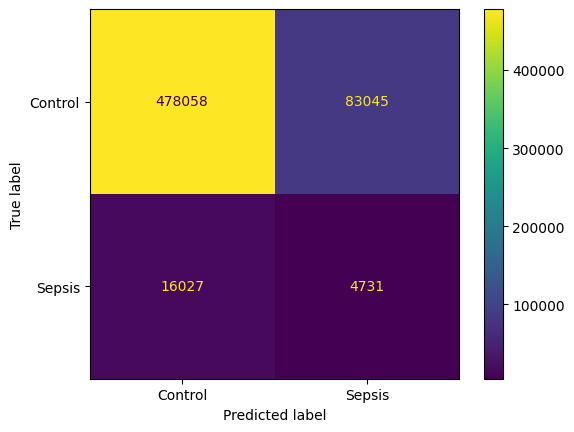

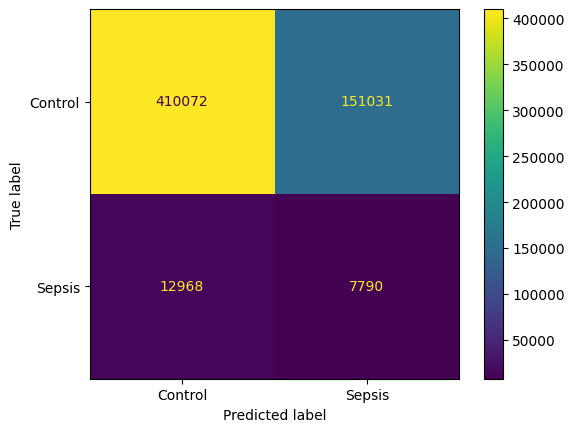

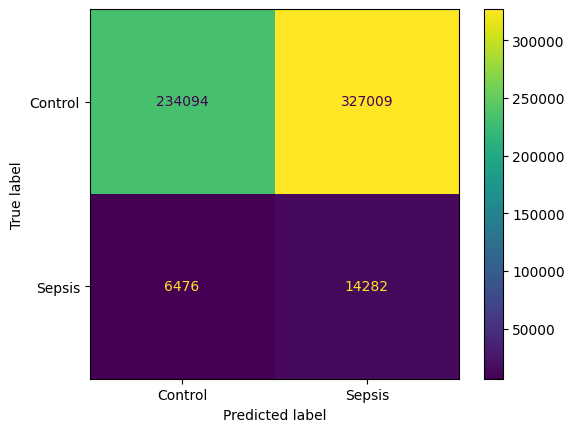

In [16]:
modelWrapper = ModelWrapper()
modelWrapper.train()